In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
#loading dataset
df=pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
df=pd.read_csv('flightdata.csv',index_col=25)

In [4]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
NaN,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
NaN,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
NaN,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
NaN,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
NaN,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


In [5]:
from datetime import datetime

In [6]:
import datetime as dt

In [7]:
pwd

'C:\\Users\\mariy\\OneDrive\\Desktop\\flight delay prediction'

In [8]:
df.shape

(11231, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11231 entries, nan to nan
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-nul

In [10]:
df.isnull().any()

YEAR                   False
QUARTER                False
MONTH                  False
DAY_OF_MONTH           False
DAY_OF_WEEK            False
UNIQUE_CARRIER         False
TAIL_NUM               False
FL_NUM                 False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
DEST_AIRPORT_ID        False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
DEP_DEL15               True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DEL15               True
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME     True
DISTANCE               False
dtype: bool

In [11]:
df['DEP_TIME'].fillna(df['DEP_TIME'].median(),inplace=True)

In [12]:
df['DEP_DELAY'].fillna(df['DEP_DELAY'].median(),inplace=True)

In [13]:
df['DEP_DEL15'].fillna(df['DEP_DEL15'].median(),inplace=True)
df['ARR_TIME'].fillna(df['ARR_TIME'].median(),inplace=True)
df['ARR_DELAY'].fillna(df['ARR_DELAY'].median(),inplace=True)
df['ARR_DEL15'].fillna(df['ARR_DEL15'].median(),inplace=True)
df['ACTUAL_ELAPSED_TIME'].fillna(df['ACTUAL_ELAPSED_TIME'].median(),inplace=True)

In [14]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,...,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.159024,...,0.141483,1537.312795,1524.214228,-2.697445,0.122429,0.010150,0.006589,190.652124,179.147983,1161.031965
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,497.917381,...,0.348535,502.512494,509.910261,38.914409,0.327795,0.100241,0.080908,78.386317,77.385301,643.683379
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,0.000000,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,907.000000,...,0.000000,1130.000000,1139.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,0.000000,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1738.000000,...,0.000000,1952.000000,1943.000000,1.000000,0.000000,0.000000,0.000000,255.000000,233.000000,1927.000000
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,1.000000,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000


In [15]:
df.ORIGIN.value_counts()

ATL    3100
MSP    2538
DTW    2201
SEA    2018
JFK    1374
Name: ORIGIN, dtype: int64

In [16]:
df.UNIQUE_CARRIER.value_counts()

DL    11231
Name: UNIQUE_CARRIER, dtype: int64

In [17]:
df.ORIGIN_AIRPORT_ID.value_counts()

10397    3100
13487    2538
11433    2201
14747    2018
12478    1374
Name: ORIGIN_AIRPORT_ID, dtype: int64

In [18]:
df.ORIGIN.unique()

array(['ATL', 'DTW', 'SEA', 'MSP', 'JFK'], dtype=object)

In [19]:
df.ORIGIN_AIRPORT_ID.unique()

array([10397, 11433, 14747, 13487, 12478], dtype=int64)

In [20]:
df.UNIQUE_CARRIER.unique()

array(['DL'], dtype=object)

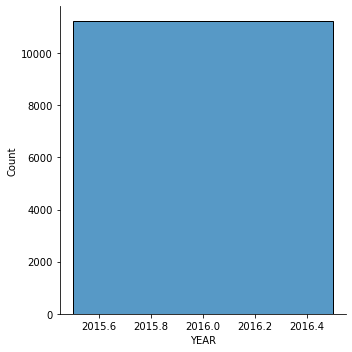

In [21]:
sns.displot(df.YEAR)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEP_TIME', ylabel='ARR_TIME'>

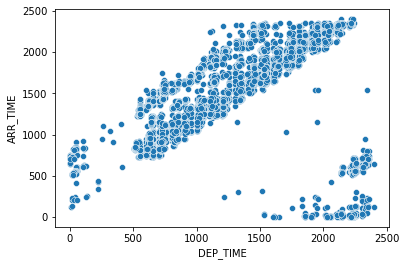

In [22]:
sns.scatterplot(df.DEP_TIME,df.ARR_TIME)

Text(0.5, 1.0, 'AIRPORT')

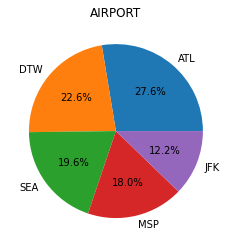

In [23]:
plt.pie(df.ORIGIN.value_counts(),labels=['ATL', 'DTW', 'SEA', 'MSP', 'JFK'],autopct="%1.1f%%")
plt.title('AIRPORT')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='ORIGIN'>

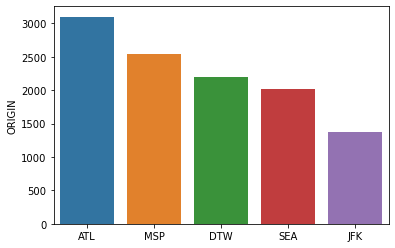

In [24]:
sns.barplot(df.ORIGIN.value_counts().index,df.ORIGIN.value_counts())

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'QUARTER'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'FL_NUM'}>,
        <AxesSubplot:title={'center':'ORIGIN_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'DEST_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'CRS_DEP_TIME'}>,
        <AxesSubplot:title={'center':'DEP_TIME'}>],
       [<AxesSubplot:title={'center':'DEP_DELAY'}>,
        <AxesSubplot:title={'center':'DEP_DEL15'}>,
        <AxesSubplot:title={'center':'CRS_ARR_TIME'}>,
        <AxesSubplot:title={'center':'ARR_TIME'}>,
        <AxesSubplot:title={'center':'ARR_DELAY'}>],
       [<AxesSubplot:title={'center':'ARR_DEL15'}>,
        <AxesSubplot:title={'center':'CANCELLED'}>,
        <AxesSubplot:title={'center':'DIVERTED'}>,
        <AxesSubplot:title={'center':'CRS_ELAPSED_TIM

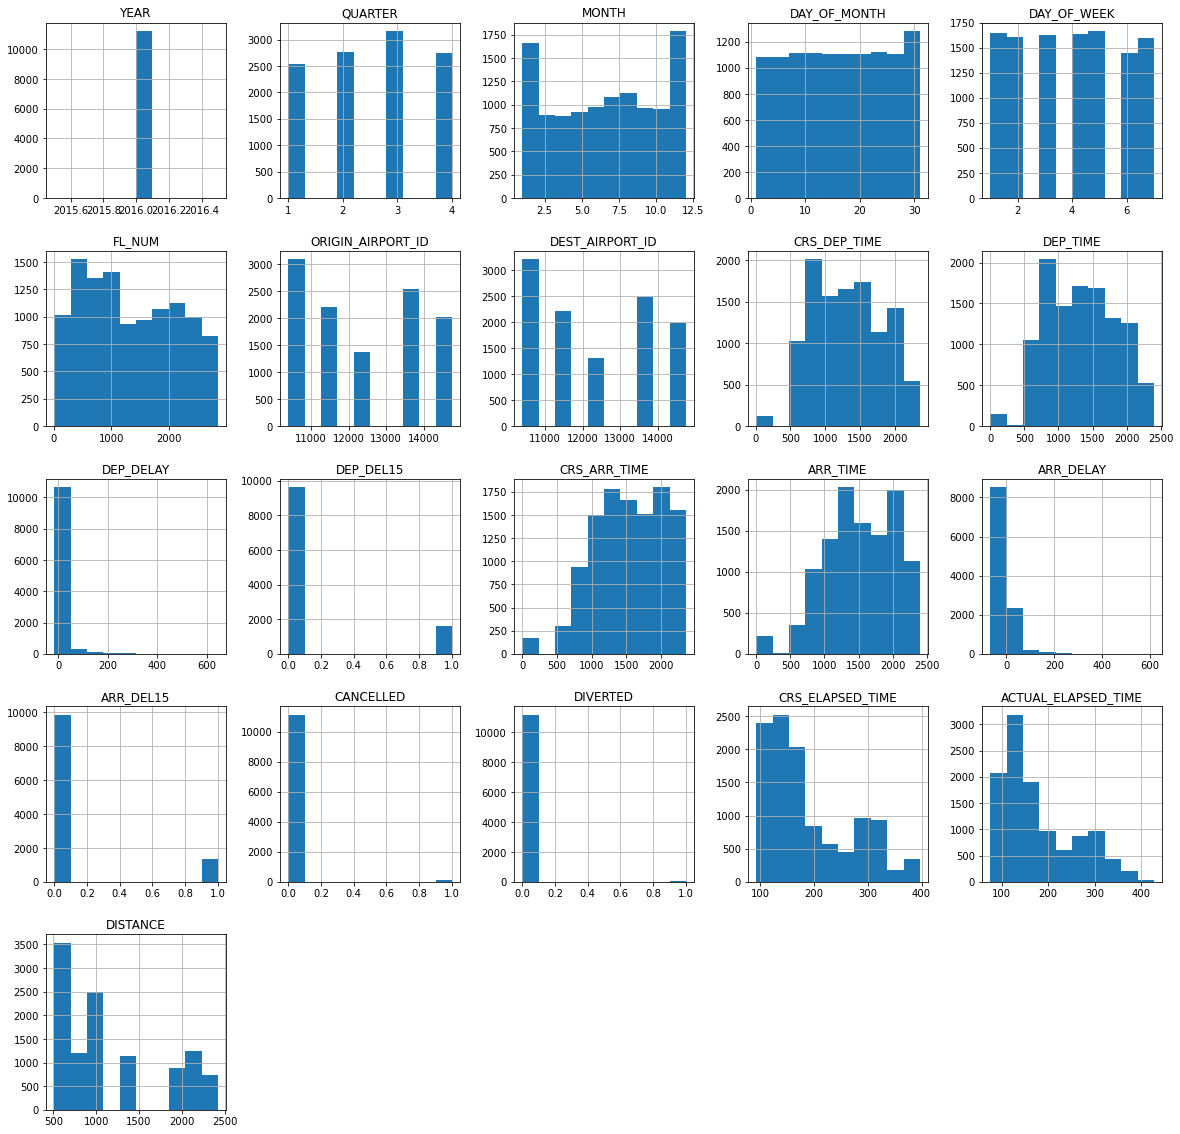

In [25]:
df.hist(figsize=(20,20))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='QUARTER'>

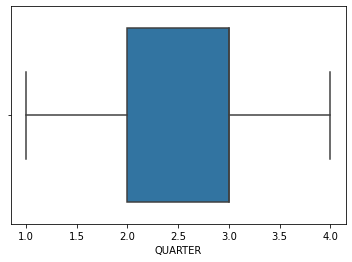

In [26]:
sns.boxplot(df.QUARTER)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MONTH'>

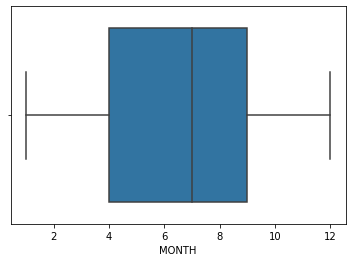

In [27]:
sns.boxplot(df.MONTH)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAY_OF_MONTH'>

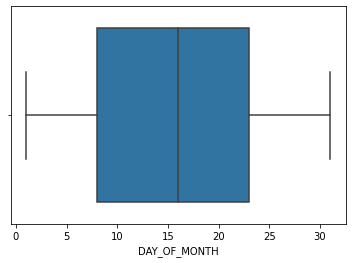

In [28]:
sns.boxplot(df.DAY_OF_MONTH)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FL_NUM'>

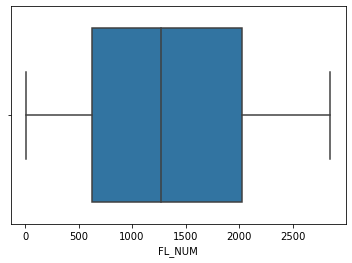

In [29]:
sns.boxplot(df.FL_NUM)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRS_ARR_TIME'>

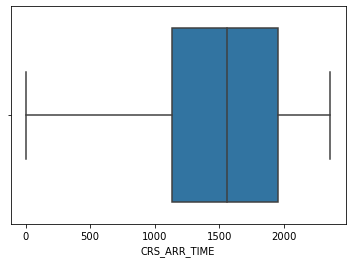

In [30]:
sns.boxplot(df.CRS_ARR_TIME)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CANCELLED'>

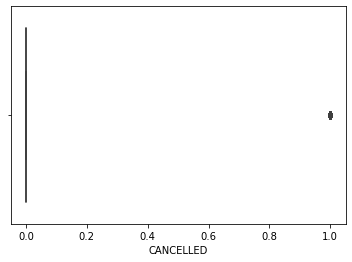

In [31]:
sns.boxplot(df.CANCELLED)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIVERTED'>

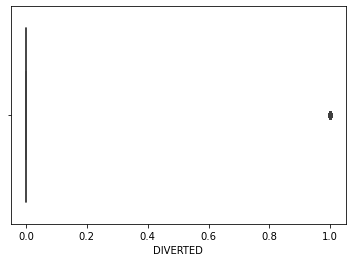

In [32]:
sns.boxplot(df.DIVERTED)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRS_ELAPSED_TIME'>

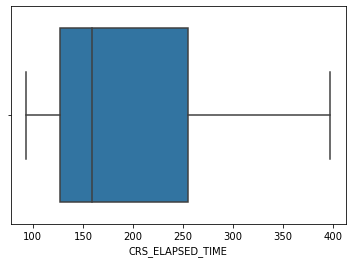

In [33]:
sns.boxplot(df.CRS_ELAPSED_TIME)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ACTUAL_ELAPSED_TIME'>

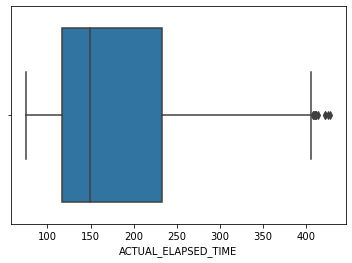

In [34]:
sns.boxplot(df.ACTUAL_ELAPSED_TIME)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DISTANCE'>

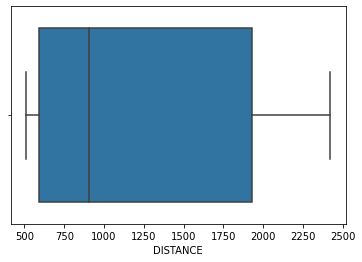

In [35]:
sns.boxplot(df.DISTANCE)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEP_TIME'>

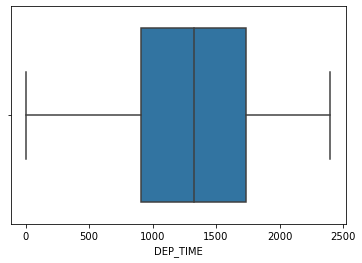

In [36]:
sns.boxplot(df.DEP_TIME)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEP_DELAY'>

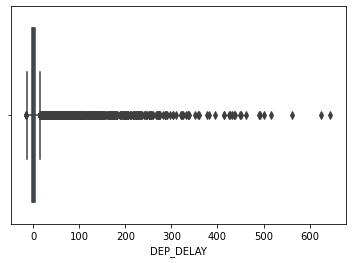

In [37]:
sns.boxplot(df.DEP_DELAY)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEP_DEL15'>

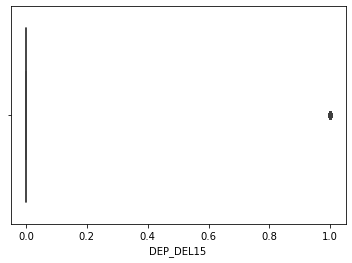

In [38]:
sns.boxplot(df.DEP_DEL15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARR_DELAY'>

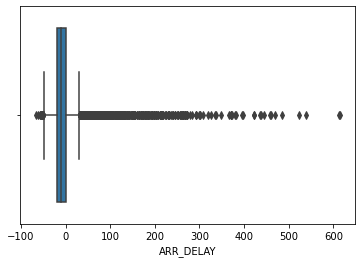

In [39]:
sns.boxplot(df.ARR_DELAY)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARR_TIME'>

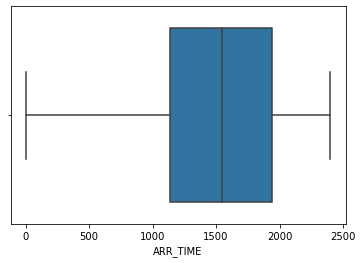

In [40]:
sns.boxplot(df.ARR_TIME)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARR_DEL15'>

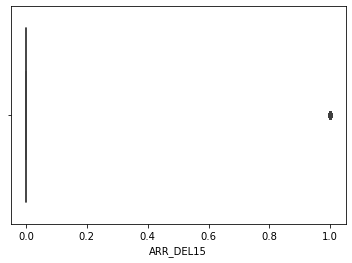

In [41]:
sns.boxplot(df.ARR_DEL15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAY_OF_WEEK'>

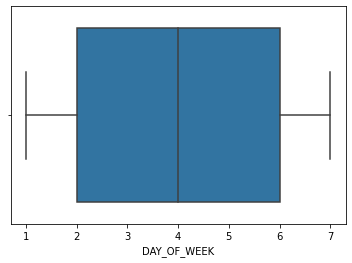

In [42]:
sns.boxplot(df.DAY_OF_WEEK)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ORIGIN_AIRPORT_ID'>

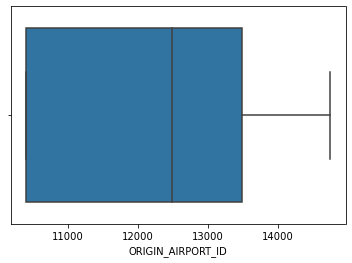

In [43]:
sns.boxplot(df.ORIGIN_AIRPORT_ID)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEST_AIRPORT_ID'>

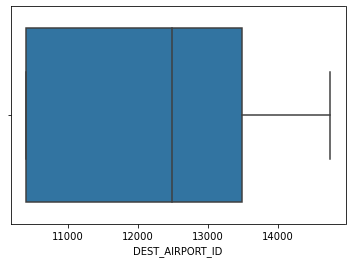

In [44]:
sns.boxplot(df.DEST_AIRPORT_ID)

In [45]:
df.groupby(by="DAY_OF_WEEK")["DEP_DEL15"].sum()

DAY_OF_WEEK
1    253.0
2    213.0
3    204.0
4    245.0
5    250.0
6    198.0
7    226.0
Name: DEP_DEL15, dtype: float64

In [46]:
df.groupby(by="MONTH")["DEP_DEL15"].sum()

MONTH
1     113.0
2     115.0
3     104.0
4      96.0
5      86.0
6     168.0
7     219.0
8     246.0
9      88.0
10     86.0
11     66.0
12    202.0
Name: DEP_DEL15, dtype: float64

In [47]:
df[df["ARR_DELAY"]>=300]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
NaN,2016,1,1,10,7,DL,N125DL,1893,11433,DTW,...,1.0,1049,1615.0,326.0,1.0,0.0,0.0,134.0,156.0,594.0
NaN,2016,1,1,24,7,DL,N3753,463,12478,JFK,...,1.0,1337,2127.0,470.0,1.0,0.0,0.0,157.0,135.0,760.0
NaN,2016,1,2,16,2,DL,N935DL,86,13487,MSP,...,1.0,1640,2140.0,300.0,1.0,0.0,0.0,105.0,84.0,528.0
NaN,2016,1,2,24,3,DL,N983DL,1156,10397,ATL,...,1.0,2007,218.0,371.0,1.0,0.0,0.0,147.0,198.0,760.0
NaN,2016,1,3,18,5,DL,N809DN,2330,14747,SEA,...,1.0,1631,246.0,615.0,1.0,0.0,0.0,286.0,256.0,2182.0
NaN,2016,2,4,10,7,DL,N624AG,1336,14747,SEA,...,1.0,1600,2317.0,437.0,1.0,0.0,0.0,311.0,299.0,2422.0
NaN,2016,2,6,16,4,DL,N319NB,2816,12478,JFK,...,1.0,1817,2318.0,301.0,1.0,0.0,0.0,202.0,168.0,1029.0
NaN,2016,3,7,1,5,DL,N171DN,43,12478,JFK,...,1.0,1813,27.0,374.0,1.0,0.0,0.0,168.0,207.0,760.0
NaN,2016,3,7,1,5,DL,N355NB,2214,13487,MSP,...,1.0,2132,307.0,335.0,1.0,0.0,0.0,177.0,190.0,1029.0
NaN,2016,3,7,1,5,DL,N377NW,984,10397,ATL,...,1.0,2344,604.0,380.0,1.0,0.0,0.0,149.0,114.0,760.0


In [48]:
sm=[6,7,8]
wt=[9,10,11]
sp=[12,1,2,3]
fl=[4,5]

In [49]:
df["SEASON"]=np.where(df["MONTH"].isin(sm),0,np.where(df["MONTH"].isin(wt),1,np.where(df["MONTH"].isin(sp),2,3)))

In [50]:
df["SEASON"].value_counts()

2    3441
0    3184
1    2808
3    1798
Name: SEASON, dtype: int64

In [51]:
#Encoding categorial columns into numerical

In [52]:
df["CANCELLED"]=np.where(df["CANCELLED"]==1,4,0)

In [53]:
df["DIVERTED"]=np.where(df["DIVERTED"]==1,3,0)

In [54]:
df.CANCELLED.unique(),df.DIVERTED.unique()

(array([0, 4]), array([0, 3]))

In [55]:
df["DELAY_15"]=df["ARR_DEL15"]+df["DEP_DEL15"]
df.DELAY_15.unique()

array([0., 1., 2.])

In [56]:
df["DELAY_15"].fillna(0,inplace=True)
df.DELAY_15.unique()

array([0., 1., 2.])

In [57]:
df["NDELAY"]=df["DELAY_15"]+df["CANCELLED"]+df["DIVERTED"]

In [58]:
df.NDELAY.unique()

array([0., 1., 2., 3., 4., 5.])

In [59]:
len(df["TAIL_NUM"].value_counts()),len(df["FL_NUM"].value_counts())

(789, 690)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11231 entries, nan to nan
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11231 non-null  float64
 14  DEP_DELAY            11231 non-null  float64
 15  DEP_DEL15            11231 non-nul

In [61]:
#Drop unnecessary columns
clm=["YEAR","UNIQUE_CARRIER","DEP_TIME","DEP_DELAY","DEP_DEL15","ARR_TIME","ARR_DELAY","ARR_DEL15","CANCELLED","DIVERTED",
    "ACTUAL_ELAPSED_TIME","DELAY_15"]
df1=df.drop(columns=clm)
df1.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,SEASON,NDELAY
NaN,1,1,1,5,N836DN,1399,10397,ATL,14747,SEA,1905,2143,338.0,2182.0,2,0.0
NaN,1,1,1,5,N964DN,1476,11433,DTW,13487,MSP,1345,1435,110.0,528.0,2,0.0
NaN,1,1,1,5,N813DN,1597,10397,ATL,14747,SEA,940,1215,335.0,2182.0,2,0.0
NaN,1,1,1,5,N587NW,1768,14747,SEA,13487,MSP,819,1335,196.0,1399.0,2,0.0
NaN,1,1,1,5,N836DN,1823,14747,SEA,11433,DTW,2300,607,247.0,1927.0,2,0.0


In [62]:
df1.dropna(how='all',axis=1)

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,SEASON,NDELAY
NaN,1,1,1,5,N836DN,1399,10397,ATL,14747,SEA,1905,2143,338.0,2182.0,2,0.0
NaN,1,1,1,5,N964DN,1476,11433,DTW,13487,MSP,1345,1435,110.0,528.0,2,0.0
NaN,1,1,1,5,N813DN,1597,10397,ATL,14747,SEA,940,1215,335.0,2182.0,2,0.0
NaN,1,1,1,5,N587NW,1768,14747,SEA,13487,MSP,819,1335,196.0,1399.0,2,0.0
NaN,1,1,1,5,N836DN,1823,14747,SEA,11433,DTW,2300,607,247.0,1927.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,4,12,30,5,N940DL,1715,11433,DTW,10397,ATL,1005,1223,138.0,594.0,2,0.0
NaN,4,12,30,5,N836DN,1770,14747,SEA,13487,MSP,1525,2046,201.0,1399.0,2,1.0
NaN,4,12,30,5,N583NW,1823,11433,DTW,14747,SEA,1959,2210,311.0,1927.0,2,0.0
NaN,4,12,30,5,N554NW,1901,10397,ATL,14747,SEA,1530,1806,336.0,2182.0,2,0.0


In [63]:
df1.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,SEASON,NDELAY
NaN,1,1,1,5,N836DN,1399,10397,ATL,14747,SEA,1905,2143,338.0,2182.0,2,0.0
NaN,1,1,1,5,N964DN,1476,11433,DTW,13487,MSP,1345,1435,110.0,528.0,2,0.0
NaN,1,1,1,5,N813DN,1597,10397,ATL,14747,SEA,940,1215,335.0,2182.0,2,0.0
NaN,1,1,1,5,N587NW,1768,14747,SEA,13487,MSP,819,1335,196.0,1399.0,2,0.0
NaN,1,1,1,5,N836DN,1823,14747,SEA,11433,DTW,2300,607,247.0,1927.0,2,0.0


In [64]:
df2=df1.drop(columns=["TAIL_NUM","FL_NUM"])

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11231 entries, nan to nan
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   QUARTER            11231 non-null  int64  
 1   MONTH              11231 non-null  int64  
 2   DAY_OF_MONTH       11231 non-null  int64  
 3   DAY_OF_WEEK        11231 non-null  int64  
 4   ORIGIN_AIRPORT_ID  11231 non-null  int64  
 5   ORIGIN             11231 non-null  object 
 6   DEST_AIRPORT_ID    11231 non-null  int64  
 7   DEST               11231 non-null  object 
 8   CRS_DEP_TIME       11231 non-null  int64  
 9   CRS_ARR_TIME       11231 non-null  int64  
 10  CRS_ELAPSED_TIME   11231 non-null  float64
 11  DISTANCE           11231 non-null  float64
 12  SEASON             11231 non-null  int32  
 13  NDELAY             11231 non-null  float64
dtypes: float64(3), int32(1), int64(8), object(2)
memory usage: 1.2+ MB


array([[<AxesSubplot:title={'center':'QUARTER'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_MONTH'}>],
       [<AxesSubplot:title={'center':'DAY_OF_WEEK'}>,
        <AxesSubplot:title={'center':'ORIGIN_AIRPORT_ID'}>,
        <AxesSubplot:title={'center':'DEST_AIRPORT_ID'}>],
       [<AxesSubplot:title={'center':'CRS_DEP_TIME'}>,
        <AxesSubplot:title={'center':'CRS_ARR_TIME'}>,
        <AxesSubplot:title={'center':'CRS_ELAPSED_TIME'}>],
       [<AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'SEASON'}>,
        <AxesSubplot:title={'center':'NDELAY'}>]], dtype=object)

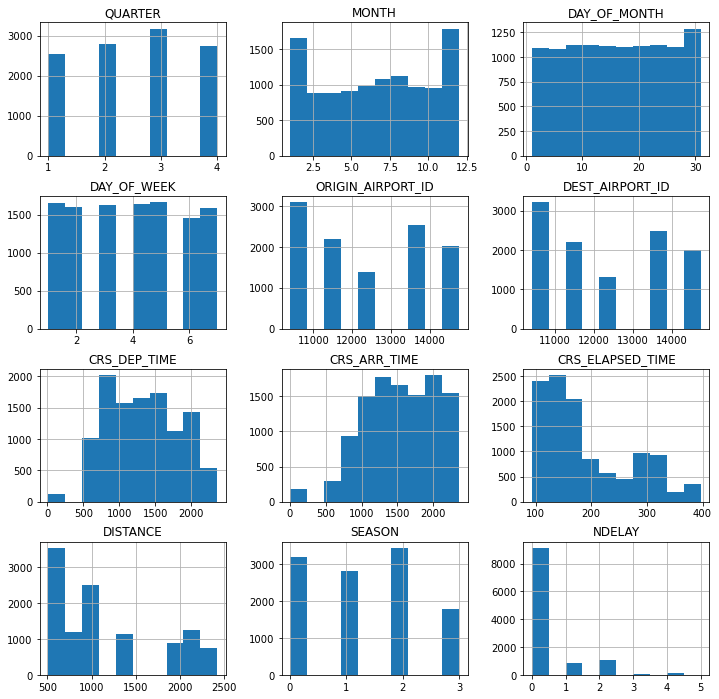

In [66]:
df2.hist(figsize=(12,12))

In [67]:
df2.NDELAY.value_counts()

0.0    9130
2.0    1035
1.0     878
4.0     120
3.0      63
5.0       5
Name: NDELAY, dtype: int64

In [68]:
#Spliting Dependent and Independent Variables

In [69]:
x=df1.drop(columns=["NDELAY","TAIL_NUM"])
y=df1.NDELAY

In [70]:
#Encoding Categorical columns to numerical

In [71]:
x["ORIGIN"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)
x["DEST"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)

In [72]:
from imblearn.combine import SMOTETomek 

In [73]:
smote=SMOTETomek(sampling_strategy={1:2000,2:2000,3:400,4:700},random_state=42)

In [74]:
x1,y2=smote.fit_resample(x,y)

In [75]:
y2.value_counts()

0.0    8327
1.0    1538
2.0    1487
4.0     641
3.0     347
5.0       3
Name: NDELAY, dtype: int64

In [76]:
from sklearn.utils import shuffle
X,Y=shuffle(x1,y2,random_state=72)
X.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,SEASON
8922,4,12,1,4,1108,13487,4,10397,1,1510,1843,153.0,907.0,2
8498,4,11,21,1,1260,13487,4,11433,2,837,1118,101.0,528.0,1
1690,1,3,14,1,462,12478,3,13487,4,805,1030,205.0,1029.0,2
591,1,1,30,6,1893,11433,2,10397,1,835,1048,133.0,594.0,2
7478,4,10,15,6,176,13487,4,10397,1,1505,1836,151.0,907.0,1


In [77]:
#Splitting Dataset for Training and Testing

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=0.2,random_state=42)

In [79]:
x_train.shape,x_test.shape

((9874, 14), (2469, 14))

In [80]:
#Model Building

In [81]:
#Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.7383556095585257

In [83]:
#Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8250303766707169

In [85]:
pd.DataFrame(rf.predict(x_test)).value_counts()

0.0    1881
1.0     258
2.0     185
4.0     106
3.0      39
dtype: int64

In [86]:
x_test.iloc[[99,88,22],:]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,SEASON
293,1,1,17,7,744,13487,4,10397,1,1005,1333,148.000000,907.0,2
11609,2,6,26,6,1330,13487,4,10397,1,1095,1424,149.163036,907.0,0
8828,4,11,1,2,2824,10397,1,13487,4,1640,1831,171.000000,907.0,1


In [87]:
y_test.iloc[[8,21,912]]

8403     0.0
5614     0.0
10094    1.0
Name: NDELAY, dtype: float64

In [88]:
rf.predict(x_test.iloc[[8,21,912],:])

array([0., 0., 1.])

In [89]:
pd.DataFrame(dc.predict(x_test)).value_counts()

0.0    1628
1.0     341
2.0     308
4.0     121
3.0      71
dtype: int64

In [90]:
#Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(solver='sag')
lr1.fit(x_train,y_train)
lr1.score(x_test,y_test)

C:\Users\mariy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6796273795058728

In [92]:
lr1.predict(x_test).sum()

0.0

In [93]:
#SVM

In [94]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.5965978128797084

In [95]:
pd.DataFrame(svm.predict(x_test)).value_counts()

0.0    2096
1.0     373
dtype: int64

In [96]:
pd.DataFrame(y_test).value_counts()

NDELAY
0.0       1678
1.0        316
2.0        300
4.0        120
3.0         55
dtype: int64

In [97]:
#KNearestNeighborsClassifie

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.711624139327663

In [99]:
pd.DataFrame(knn.predict(x_test)).value_counts()

0.0    1961
1.0     219
2.0     210
4.0      60
3.0      19
dtype: int64

In [100]:
knn.predict(x_test.iloc[[8,21,912],:])

array([0., 0., 1.])

In [101]:
#Evaluation of Random Forest

Testing Sensitivity for Random Forest 0.9259259259259259
Testing Specificity for Random Forest 0.7924528301886793
Testing Precision for Random Forest 0.9732360097323601
Testing accuracy for Random Forest 0.8250303766707169


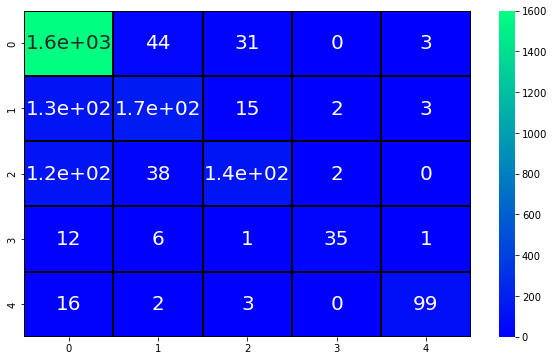

In [102]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=rf.predict(x_test)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

In [103]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      1678
         1.0       0.65      0.53      0.59       316
         2.0       0.73      0.45      0.56       300
         3.0       0.90      0.64      0.74        55
         4.0       0.93      0.82      0.88       120

    accuracy                           0.83      2469
   macro avg       0.81      0.68      0.73      2469
weighted avg       0.82      0.83      0.81      2469



In [104]:
##Evaluation of Decision Tree

Testing Accuracy for Decision Tree 0.8726968174204355
Testing Sensitivity for Decision Tree 0.9303713527851459
Testing Specificity for Decision Tree 0.5653710247349824
Testing Precision for Decision Tree 0.919397116644823
Testing accuracy for Decision Tree 0.7383556095585257


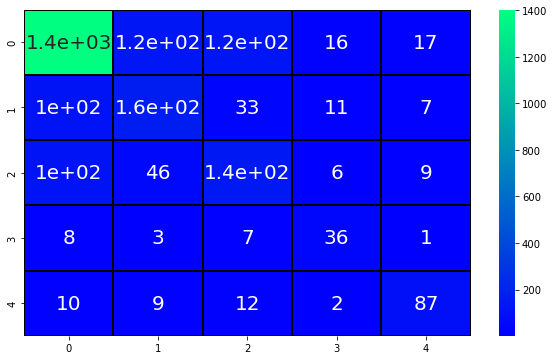

In [105]:
pred1=dc.predict(x_test)
cm1=confusion_matrix(y_test, pred1)
plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Decision Tree',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree',(TN/(TN+FP)))
print('Testing Precision for Decision Tree',(TP/(TP+FP)))
print('Testing accuracy for Decision Tree',accuracy_score(y_test, pred1))

In [106]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1678
         1.0       0.47      0.51      0.49       316
         2.0       0.44      0.46      0.45       300
         3.0       0.51      0.65      0.57        55
         4.0       0.72      0.72      0.72       120

    accuracy                           0.74      2469
   macro avg       0.60      0.64      0.62      2469
weighted avg       0.75      0.74      0.74      2469



In [107]:
import pickle

In [108]:
pickle.dump(rf,open("rfmodel.pkl",'wb'))

In [109]:
model=pickle.load(open('rfmodel.pkl','rb'))

In [111]:
pwd

'C:\\Users\\mariy\\OneDrive\\Desktop\\flight delay prediction'

In [112]:
#Deployment

In [ ]:
!pip install -U ibm-watson-machine-learning

In [ ]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np